In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import networkx as nx

N = 10
A = np.zeros([N, N])
for i in range(5):
    for j in range(5):
        if i!= j: A[i, j]=1
        
for i in range(7, 10):
    for j in range(5, 10):
        if i != j: A[i, j]=1


print(A)

[[0. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 0.]]


[1, 1, 1, 1, 1, 2, 2, 3, 3, 3]


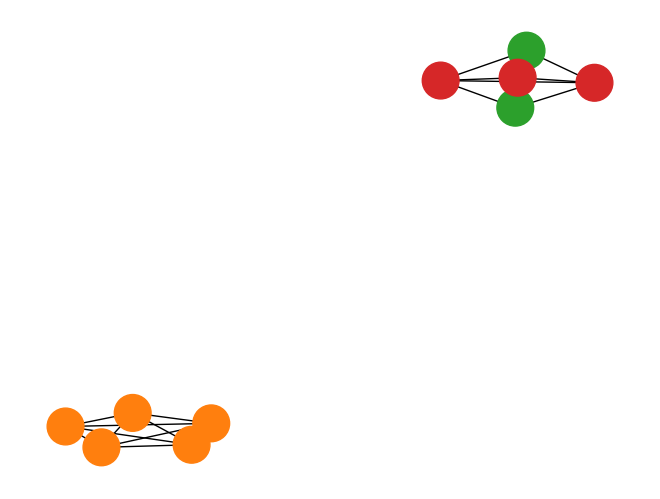

In [2]:

G = nx.from_numpy_array(A)
y_hat = [1 for i in range(5)]+[2, 2]+[3 for i in range(7, 10)]
print(y_hat)
cmap = plt.cm.tab10
pos = nx.spring_layout(G)
nx.draw(
        G,
        pos,
        with_labels=False,
        node_color=[cmap(c) for c in y_hat],  # <--- color by cluster
        node_size=700
)
plt.show()

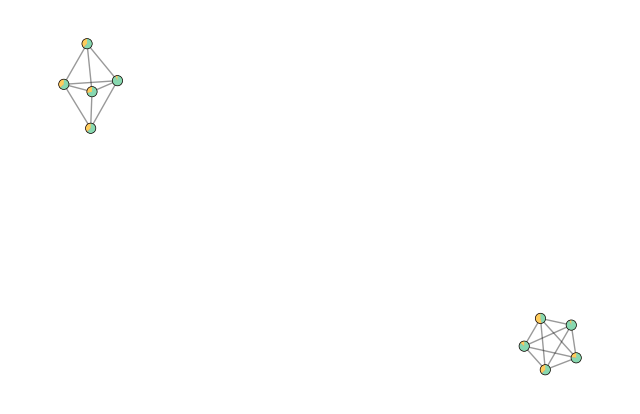

In [34]:
colors = ['#ff6f69', '#ffcc5c', '#88d8b0']
draw_graph_with_pie_nodes(A, P, colors, node_radius=0.02)

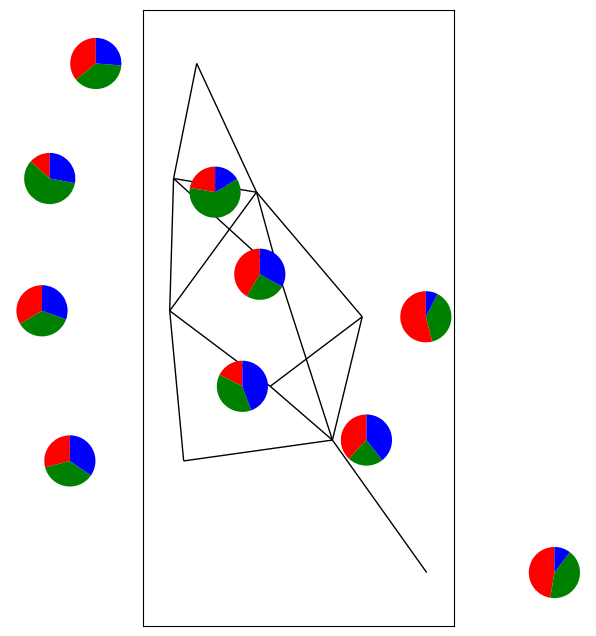

In [3]:

def draw_graph_with_pie_nodes(A, P, class_colors, node_size=100, pie_size=0.05):

    n, k = P.shape
    # build graph
    G = nx.from_numpy_array(A) 
    pos = nx.spring_layout(G)  # dict: node -> (x,y)
    

    fig, ax = plt.subplots(figsize=(8,8))

    # draw edges

    nx.draw_networkx_edges(G, pos, ax=ax)
    ax.set_aspect('equal')
    #ax.axis('off')
    
    # transform to display coords
    trans = ax.transData.transform
    trans_inv = fig.transFigure.inverted().transform
    
    for i, (x,y) in pos.items():
        # get figure coords
        xx, yy = trans((x,y))
        xa, ya = trans_inv((xx, yy))
        # create small axes at that position
        width = pie_size
        height = pie_size
        a = fig.add_axes([xa - width/2.0, ya - height/2.0, width, height])
        a.set_aspect('equal')
        a.axis('off')
        # draw pie chart for node i
        fracs = P[i]
        # optional: filter very small values if you want
        a.pie(fracs, colors=class_colors, startangle=90)
    
    plt.show()


# Example usage:
n = 10
k = 3
# synthetic data
A = (np.random.rand(n,n) < 0.3).astype(int)
A = np.triu(A,1)
A = A + A.T
P = np.random.rand(n,k)
P = P / P.sum(axis=1, keepdims=True)
class_colors = ['red', 'green', 'blue']

draw_graph_with_pie_nodes(A, P, class_colors, pie_size=0.08)


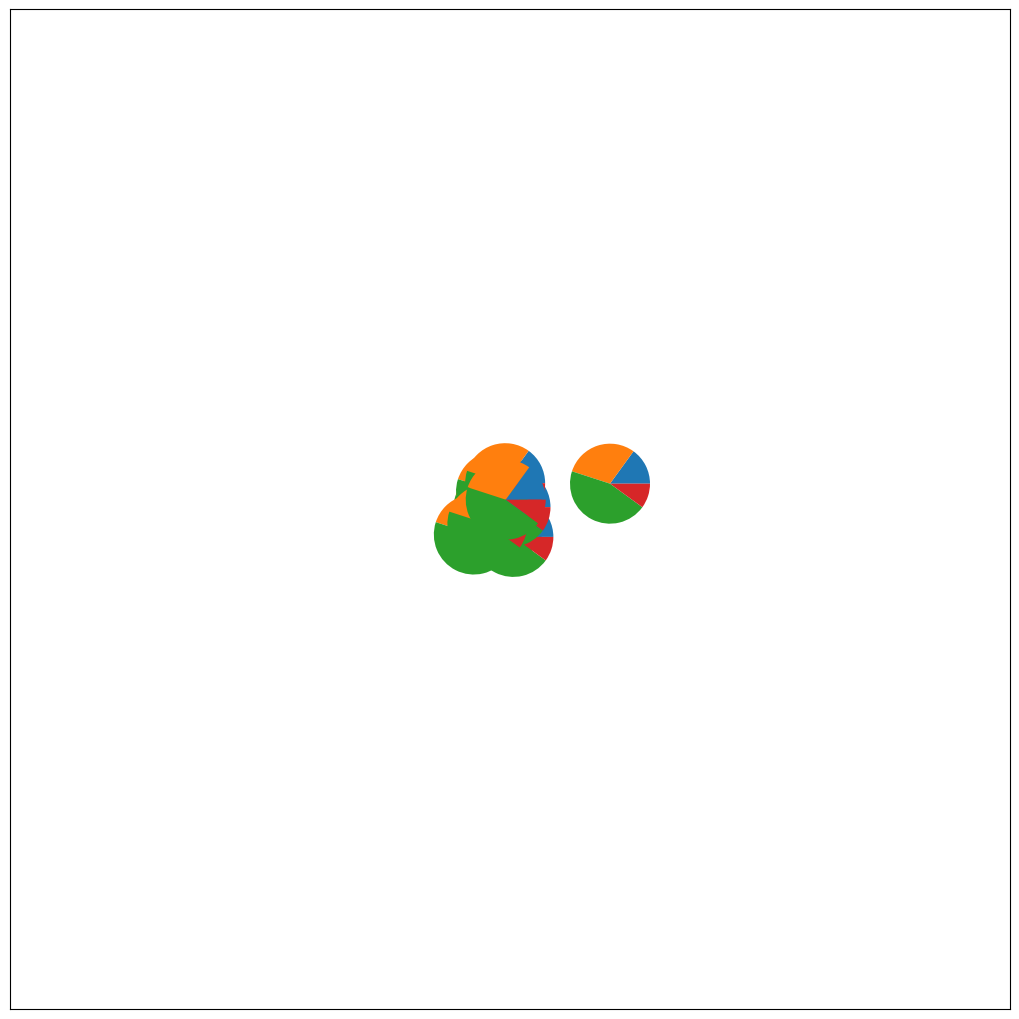

In [25]:
#G=nx.complete_graph(4)
G = nx.from_numpy_array(A)
pos=nx.spring_layout(G)

fig=plt.figure(figsize=(10,10))
ax=plt.axes([0,0,1,1])
ax.set_aspect('equal')
nx.draw_networkx_edges(G,pos,ax=ax)

plt.xlim(-5,5)
plt.ylim(-5,5)

trans=ax.transData.transform
trans2=fig.transFigure.inverted().transform

piesize=0.1
p2=piesize/2.0
for n in G:
    xx,yy=trans(pos[n]) # figure coordinates
    xa,ya=trans2((xx,yy)) # axes coordinates
    a = plt.axes([xa-p2,ya-p2, piesize, piesize])
    a.set_aspect('equal')
    fracs = [15,30,45, 10]
    a.pie(fracs)

plt.savefig('pc.png')


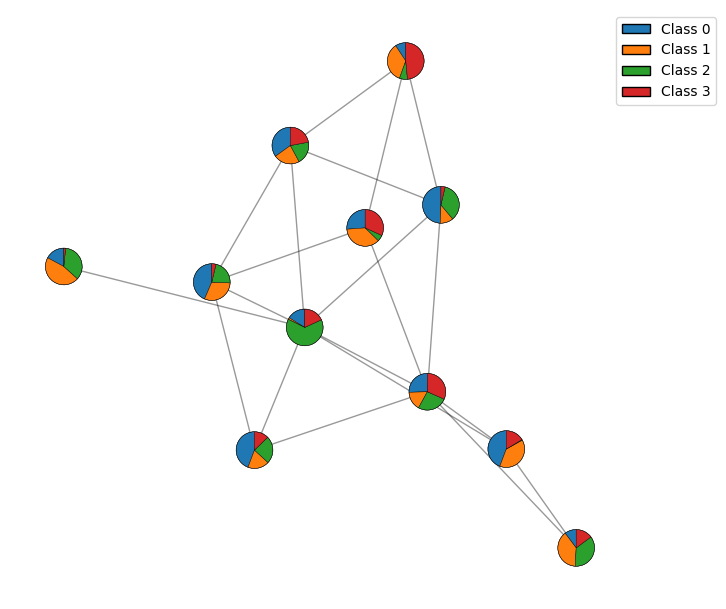

In [86]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge, Patch

def draw_graph_with_pie_nodes(A, eta, class_colors=None, class_labels=None, node_radius=0.1):
    """
    A : (n,n) adjacency matrix
    eta : (n,k) probability matrix (rows sum to 1)
    class_colors : list of length k (matplotlib colors)
    node_radius : radius of pie chart nodes in layout units
    """

   
    n, k = eta.shape

    if not class_colors:
        cmap = plt.get_cmap("tab10")
        class_colors = [cmap(i % cmap.N) for i in range(k)]


    if class_labels is None:
        class_labels = [f"Class {i}" for i in range(k)]


    G = nx.from_numpy_array(A)
    pos = nx.spring_layout(G, seed=0)


    fig, ax = plt.subplots(figsize=(8,8))
    nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.4)
    
    for i, (x, y) in pos.items():
        start_angle = 90
        for frac, color in zip(eta[i], class_colors):
            if frac <= 0:  # skip empty slices
                continue
            theta1 = start_angle
            theta2 = start_angle + 360 * frac
            wedge = Wedge(center=(x, y),
                          r=node_radius,
                          theta1=theta1,
                          theta2=theta2,
                          facecolor=color,
                          edgecolor='black',
                          linewidth=0.3
                          )
            ax.add_patch(wedge)
            start_angle = theta2
    
    for (x, y) in pos.values():
        circ = plt.Circle((x, y), node_radius, fill=False, edgecolor='black', lw=0.3)
        ax.add_patch(circ)


    legend_patches = [Patch(facecolor=c, edgecolor='black', label=label) for c, label in zip(class_colors, class_labels)]
    ax.legend(handles=legend_patches, loc='upper right', bbox_to_anchor=(1.15, 1))

    
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()


# Example usage
n = 12
k = 4
np.random.seed(0)
A = (np.random.rand(n,n) < 0.3).astype(int)
A = np.triu(A, 1)
A += A.T
P = np.random.rand(n, k)
P /= P.sum(axis=1, keepdims=True)

#colors = ['#ff6f69', '#ffcc5c', '#88d8b0']
draw_graph_with_pie_nodes(A, P, node_radius=0.02)


In [63]:
k = 3

cmap = plt.get_cmap("tab10")
X = [mcolors.to_hex(cmap(i / k)) for i in range(k+1)]

[(np.float64(0.12156862745098039),
  np.float64(0.4666666666666667),
  np.float64(0.7058823529411765),
  np.float64(1.0)),
 (np.float64(0.8392156862745098),
  np.float64(0.15294117647058825),
  np.float64(0.1568627450980392),
  np.float64(1.0)),
 (np.float64(0.8901960784313725),
  np.float64(0.4666666666666667),
  np.float64(0.7607843137254902),
  np.float64(1.0))]

In [80]:
import matplotlib.colors as mcolors

def draw_graph_hard_clusters(A, y, class_colors=None, class_labels=None, node_size=None):
    """
    A : (n,n) 
    y : (n,k) 
    class_colors : coleurs, facultatives
    node_radius : taille des nodes
    """
    n = len(y)
    k = int(np.max(y))

    if not node_size:
        node_size = 6000/n

    if not class_colors:
        cmap = plt.get_cmap("tab10")
        class_colors = [mcolors.to_hex(cmap(i % cmap.N)) for i in range(k+1)]
    
    if class_labels is None:
        class_labels = [f"Class {i}" for i in range(k+1)]

    node_colors = [ class_colors[i] for i in y]

    if np.issubdtype(np.array(node_colors).dtype, np.number):
        cmap = plt.get_cmap("tab10")
        node_colors = [cmap(v / max(node_colors)) for v in node_colors]
    

    G = nx.from_numpy_array(A)
    pos = nx.spring_layout(G, seed=0)

    fig, ax = plt.subplots(figsize=(8,8))
    nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.4)
    nx.draw_networkx_nodes(G, pos,
                           node_color=node_colors,
                           node_size=node_size,
                           edgecolors='black',
                           linewidths=0.5,
                           ax=ax)


    for (x, y) in pos.values():
        circ = plt.Circle((x, y), node_size/30000, fill=False, edgecolor='black', lw=0.5)
        ax.add_patch(circ)


    legend_patches = [Patch(facecolor=c, edgecolor='black', label=label) for c, label in zip(class_colors, class_labels)]
    ax.legend(handles=legend_patches, loc='upper right', bbox_to_anchor=(1.15, 1))



    
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

    
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()




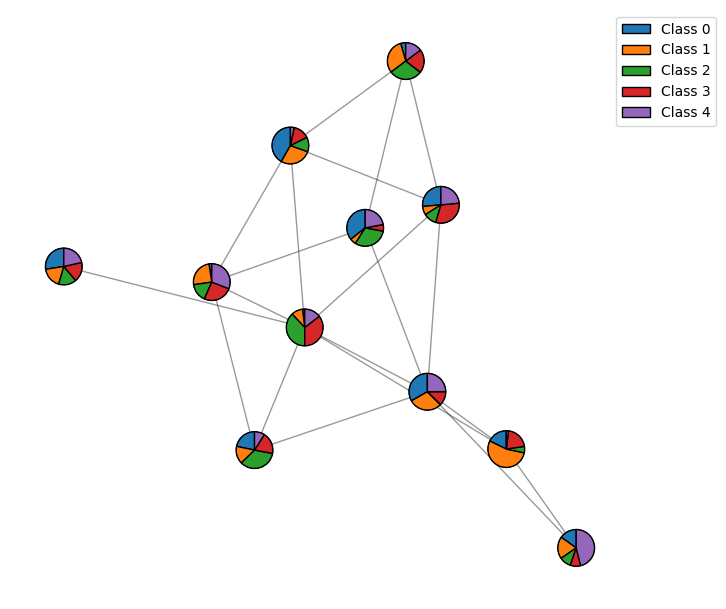

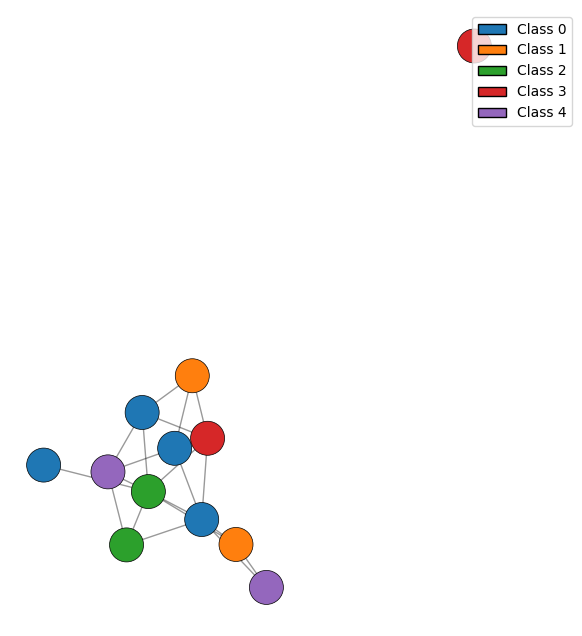

In [81]:
n = 12
k = 5
np.random.seed(0)
A = (np.random.rand(n,n) < 0.3).astype(int)
A = np.triu(A, 1)
A += A.T
P = np.random.rand(n, k)
P /= P.sum(axis=1, keepdims=True)

y = np.argmax(P, axis=1)
#colors = ['#ff6f69', '#ffcc5c', '#88d8b0']
draw_graph_with_pie_nodes(A, P, node_radius=0.02)
draw_graph_hard_clusters(A, y, node_size=600)

In [41]:
node_colors


NameError: name 'node_colors' is not defined